# One-to-One and Many-to-One cases

Take Jaynes-Cummings model as an example. The master equation is given by
$$\dot{\rho}=-i[H,\rho]+\kappa\mathcal{D}[a]\rho+\gamma\mathcal{D}[\sigma]\rho,$$
where $H = \omega_c a^\dagger a + \omega_e \sigma^\dagger \sigma+g(a^\dagger\sigma+\sigma^\dagger a)$.

In [1]:
import sys, os
sys.path.append(os.path.abspath(r'..'))
from main.Qcs import qcs

In [ ]:
import qutip as qt
import numpy as np
# %matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# system parameters
ωc = 0
ωe = 0
κ = 1
g = κ
γ = 0.1 * κ

In [3]:
# construct effective Hamiltonian
Heff = []
Heff.append([ωc-1j*κ/2, ("ad",0), ("a",0)])
Heff.append([ωe-1j*γ/2, ("sp",0), ("sm",0)])
Heff.append([g, ("ad",0), ("sm",0)])
Heff.append([g, ("a",0), ("sp",0)])

## The different input and output channels

### Calculate 2nd-order unequal-time correlation function about cavity mode
$$g^{(2)}(\tau)=\frac{\langle a^{\dagger}(0)a^\dagger(\tau)a(\tau)a(0)\rangle_{\text{ss}}}{\langle a^{\dagger}a\rangle_{\text{ss}}^{n}}$$

In [4]:
mode_c = [np.sqrt(κ/2), ("a", 0)]
mode_e = [np.sqrt(γ/2), ("sm", 0)]

Output_c = qcs.Output_channel("c1", mode_c)

### 1.The cavity-driven case:
$$H_{d}^{(c)} = \Omega_c(a e^{it\omega_{dc}}+\text{h.c.}) $$

In [5]:
ω_dc = 0
Input_c = qcs.Input_channel("b1", mode_c, ω_dc)

In [6]:
τ = np.linspace(0, 40, 4000)
result_1 = qcs(Heff, Input_c, Output_c)
g2_tau_ana_c_a = result_1.calculate_2nd_uETCF('c1',τ) # 2nd-order uETCF

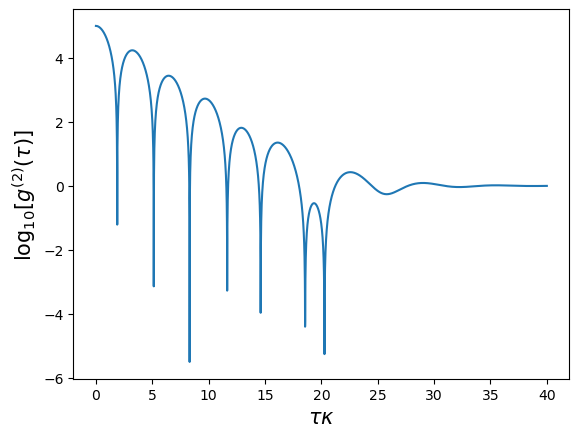

In [7]:
plt.plot(τ, np.log10(g2_tau_ana_c_a))
plt.xlabel(r"$\tau\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(2)}(\tau)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

### 2.The atom-driven case:
$$H_{d}^{(e)} = \Omega_e(\sigma e^{it\omega_{de}}+\text{h.c.}) $$

In [8]:
ω_de = 0
Input_e = qcs.Input_channel("b2", mode_e, ω_de)

In [9]:
τ = np.linspace(0, 40, 4000)
result_2 = qcs(Heff, Input_e, Output_c)
g2_tau_ana_e_a = result_2.calculate_2nd_uETCF('c1',τ) # 2nd-order uETCF

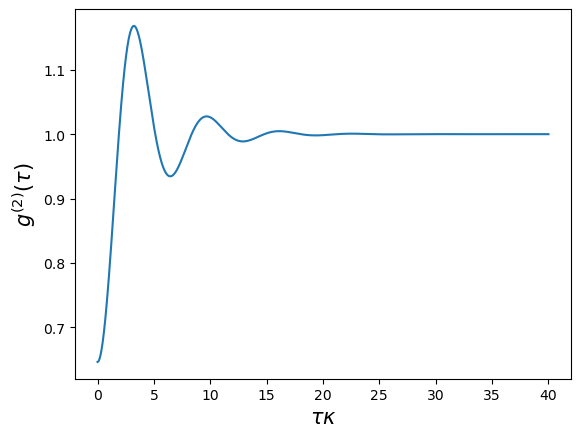

In [10]:
plt.plot(τ, g2_tau_ana_e_a)
plt.xlabel(r"$\tau\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$g^{(2)}(\tau)$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

### 3.The cavity-atom-driven case:
$$H_{d}^{(ce)} = H_{d}^{(c)}+H_{d}^{(e)} $$
Assuming $\Omega_c=\eta\Omega_e$.

####  The identical driving frequencies: $\omega_{dc}=\omega_{de}=\omega_d$

In [11]:
η=1
ω_d = 0
Input_c = qcs.Input_channel("b1", mode_c, ω_d)
Input_e = qcs.Input_channel("b2", mode_e, ω_d)
Input = [Input_c, Input_e]
ratio = [1, η*np.sqrt((κ/2)/(γ/2))]

In [12]:
τ = np.linspace(0, 40, 4000)
result_3 = qcs(Heff, Input, Output_c, ratio)
g2_tau_ana_ce_a = result_3.calculate_2nd_uETCF('c1',τ) # 2nd-order uETCF

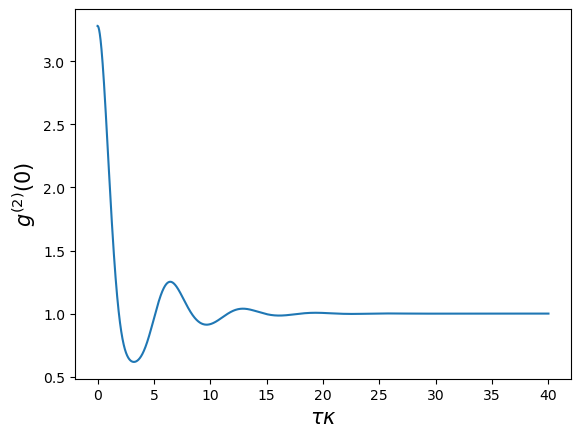

In [13]:
plt.plot(τ, g2_tau_ana_ce_a)
plt.xlabel(r"$\tau\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$g^{(2)}(0)$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

## The identical input and output channels

### Calculate 2nd-order unequal-time correlation function about output mode
$$g^{(2)}(\tau)=\frac{\langle\psi_{\text{out}}| c^{\dagger }(0)c^{\dagger}(\tau)c(\tau)c(0)|\psi_{\text{out}}\rangle}{\langle \psi_{\text{out}}|c^{\dagger}(0)c(0)|\psi_{\text{out}}\rangle^{2}}$$

In [14]:
mode_c = [np.sqrt(κ/2), ("a", 0)]
mode_e = [np.sqrt(γ/2), ("sm", 0)]

Output = qcs.Output_channel("c", mode_c)

### 1.The single input case:
$$|\psi_{\text{in}}\rangle=|\beta\rangle_{\omega_d}^{c}\otimes|0\rangle_{\text{B}}\otimes|g\rangle,$$ 
where $\omega_d$ represents driving frequency, $\beta$ represents the coherent amplitude, and $c$ represents the input channel.

In [15]:
ω_d = 0
Input_1 = qcs.Input_channel("c", mode_c, ω_d)

In [16]:
τ = np.linspace(0, 40, 4000)
result_4 = qcs(Heff, Input_1, Output)
g2_tau_ana_c_c = result_4.calculate_2nd_uETCF('c',τ) # 2nd-order uETCF

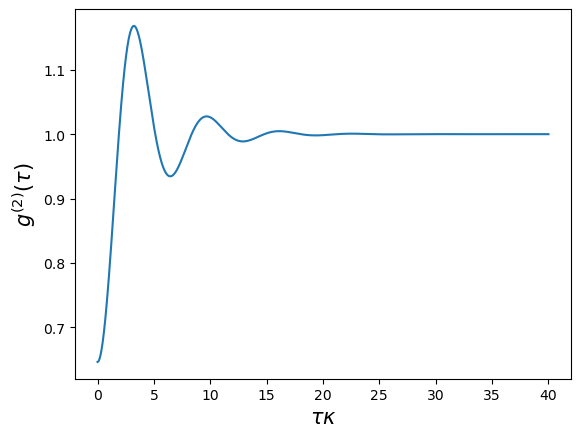

In [17]:
plt.plot(τ, g2_tau_ana_c_c)
plt.xlabel(r"$\tau\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$g^{(2)}(\tau)$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

### 2.The double input case:
$$|\psi_{\text{in}}\rangle=|\beta_1\rangle_{\omega_{d1}}^{c}\otimes|\beta_2\rangle_{\omega_{d2}}^{b}\otimes|0\rangle_{\text{B}}\otimes|g\rangle$$ 
Assuming $\frac{\beta_1}{\beta_2}=\eta\sqrt{\frac{\kappa}{\gamma}}$.

####  The identical driving frequencies: $\omega_{d1}=\omega_{d2}=\omega_d$

In [18]:
η=1
ω_d = 0
Input_1 = qcs.Input_channel("c", mode_c, ω_d)
Input_2 = qcs.Input_channel("b", mode_e, ω_d)
Input = [Input_1, Input_2]
ratio = [1, η*np.sqrt((κ/2)/(γ/2))]

In [19]:
τ = np.linspace(0, 40, 4000)
result_5 = qcs(Heff, Input, Output, ratio)
g2_tau_ana_ce_c = result_5.calculate_2nd_uETCF('c',τ) # 2nd-order uETCF

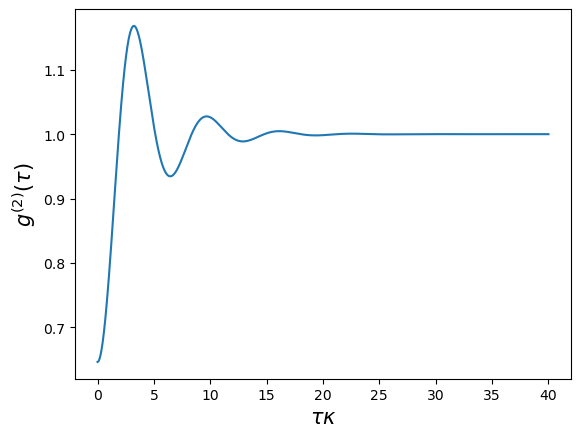

In [20]:
plt.plot(τ, g2_tau_ana_ce_c)
plt.xlabel(r"$\tau\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$g^{(2)}(\tau)$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

# Numerical comparison by QuTip

In [21]:
options = qt.Options(atol=1e-15, rtol=1e-15, order=20)

N = 5 # cavity dimension

a = qt.tensor(qt.destroy(N), qt.qeye(2))
σ = qt.tensor(qt.qeye(N), qt.sigmam())

c_ops = [np.sqrt(κ) * a, np.sqrt(γ) * σ]

># The different input and output channels

## The cavity-driven and atom-driven cases

In [22]:
Ωc = 5e-3
Ωe = 5e-3

ω_d = 0

H_dc = (ωc-ω_d) * (a.dag() * a) + (ωe-ω_d) * (σ.dag() * σ) + g * (a.dag() * σ + σ.dag() * a) + Ωc * (a + a.dag())
H_de = (ωc-ω_d) * (a.dag() * a) + (ωe-ω_d) * (σ.dag() * σ) + g * (a.dag() * σ + σ.dag() * a) + Ωe * (σ + σ.dag())

r1_ss = qt.steadystate(H_dc, c_ops)
r2_ss = qt.steadystate(H_de, c_ops)

n1 = qt.expect(a.dag() * a, r1_ss)
n2 = qt.expect(a.dag() * a, r2_ss)

tau = np.linspace(0, 40, 4000)
G2_1 = qt.correlation_3op_1t(H_dc, r1_ss, tau, c_ops, a.dag(), a.dag() * a, a, options=options)
G2_2 = qt.correlation_3op_1t(H_de, r2_ss, tau, c_ops, a.dag(), a.dag() * a, a, options=options)
g2_tau_num_c_a = G2_1 / (n1 ** 2)
g2_tau_num_e_a = G2_2 / (n2 ** 2)

### The cavity-driven comparison

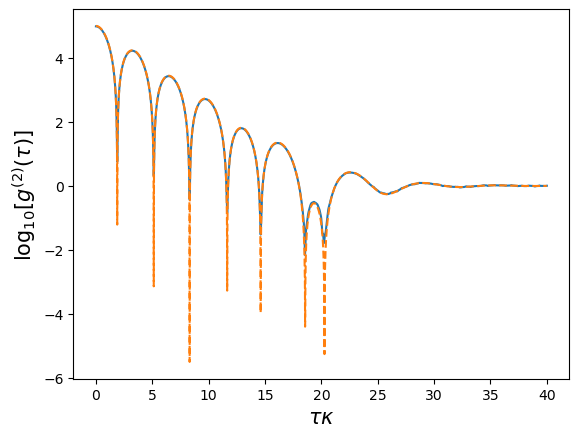

In [23]:
plt.plot(tau, np.log10(np.real(g2_tau_num_c_a)))
plt.plot(τ, np.log10(g2_tau_ana_c_a), '--')

plt.xlabel(r"$\tau\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(2)}(\tau)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

Note that The values are not identical in the dips due to the finite driving strength.

### The atom-driven comparison

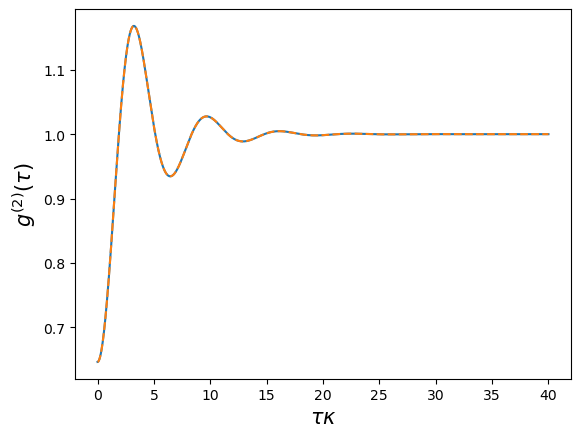

In [24]:
plt.plot(tau, np.real(g2_tau_num_e_a))
plt.plot(τ, g2_tau_ana_e_a, '--')
plt.xlabel(r"$\tau\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$g^{(2)}(\tau)$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

## The cavity-atom-driven case

### The identical driving frequencies

In [25]:
Ωc = 5e-3
Ωe = 5e-3

ω_d = 0

H_dce = (ωc-ω_d) * (a.dag() * a) + (ωe-ω_d) * (σ.dag() * σ) + g * (a.dag() * σ + σ.dag() * a) + Ωc * (a + a.dag())+ Ωe * (σ + σ.dag())

r_ss = qt.steadystate(H_dce, c_ops)

n = qt.expect(a.dag() * a, r_ss)

tau = np.linspace(0, 40, 4000)
G2 = qt.correlation_3op_1t(H_dce, r_ss, tau, c_ops, a.dag(), a.dag() * a, a, options=options)
g2_tau_num_ce_a = G2 / (n ** 2)

#### The cavity-atom-driven comparison

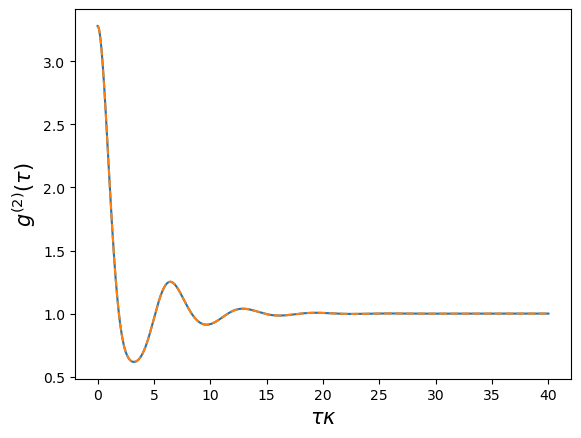

In [26]:
plt.plot(tau, np.real(g2_tau_num_ce_a))
plt.plot(τ, g2_tau_ana_ce_a, '--')
plt.xlabel(r"$\tau\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$g^{(2)}(\tau)$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

># The identical input and output channels

## The single input case

In [27]:
Ωc = 5e-2

c = np.sqrt(κ/2)*(Ωc/(κ/2)-1j*a)

ω_d = 0

H_dc = (ωc-ω_d) * (a.dag() * a) + (ωe-ω_d) * (σ.dag() * σ) + g * (a.dag() * σ + σ.dag() * a) + Ωc * (a + a.dag())
r_ss = qt.steadystate(H_dc, c_ops)
nc = qt.expect(c.dag() * c, r_ss)

tau = np.linspace(0, 40, 4000)
G2 = qt.correlation_3op_1t(H_dc, r_ss, tau, c_ops, c.dag(), c.dag() * c, c, options=options)
g2_tau_num_c_c = G2 / (nc ** 2)

### The single input comparison

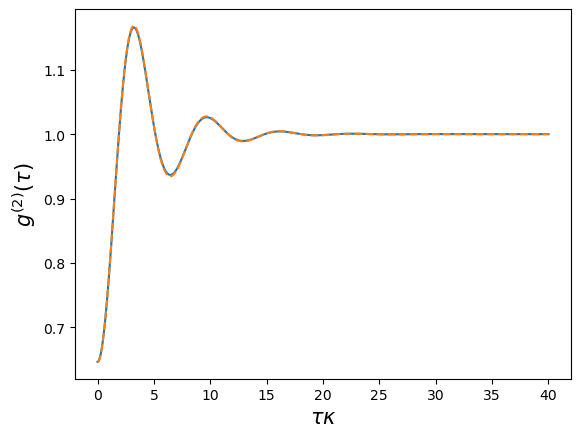

In [28]:
plt.plot(tau, np.real(g2_tau_num_c_c))
plt.plot(τ, g2_tau_ana_c_c, '--')

plt.xlabel(r"$\tau\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$g^{(2)}(\tau)$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()

## The double input case

### The identical driving frequencies

In [29]:
Ωc = 1e-2
Ωe = 1e-2

c = np.sqrt(κ/2)*(Ωc/(κ/2)-1j*a)

ω_d = 0

H_dce = (ωc-ω_d) * (a.dag() * a) + (ωe-ω_d) * (σ.dag() * σ) + g * (a.dag() * σ + σ.dag() * a) + Ωc * (a + a.dag())+ Ωe * (σ + σ.dag())

r_ss = qt.steadystate(H_dce, c_ops)

nc = qt.expect(c.dag() * c, r_ss)

tau = np.linspace(0, 40, 4000)
G2 = qt.correlation_3op_1t(H_dce, r_ss, tau, c_ops, c.dag(), c.dag() * c, c, options=options)
g2_tau_num_ce_c = G2 / (nc ** 2)

#### The cavity-atom-driven comparison

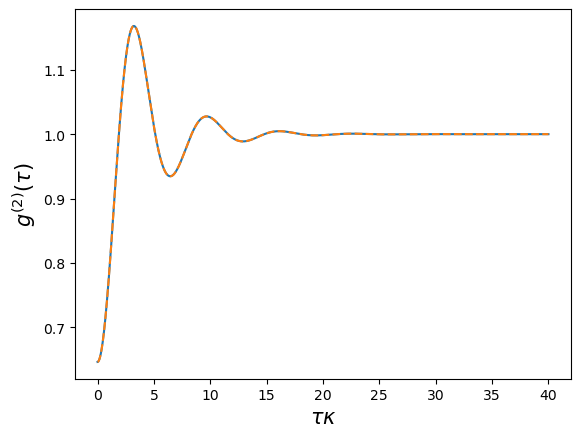

In [30]:
plt.plot(tau, np.real(g2_tau_num_ce_c))
plt.plot(τ, g2_tau_ana_ce_c, '--')

plt.xlabel(r"$\tau\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$g^{(2)}(\tau)$", fontdict={"family": "Times New Roman", "size": 15})
plt.show()